1. Implement the SIFT algorithm to detect and match key points between two images.

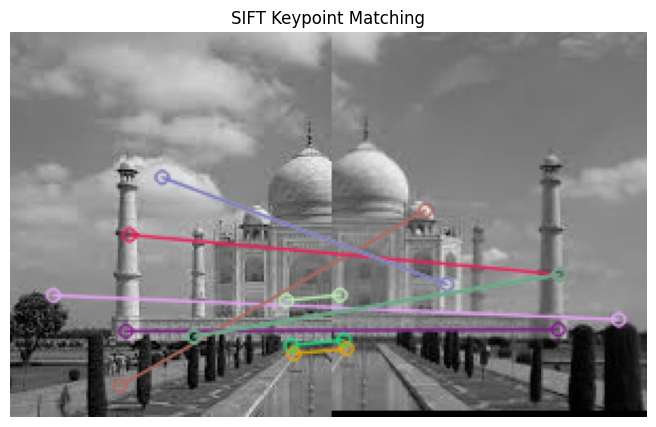

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_match_sift(img1_path, img2_path):
    img1 = cv2.imread('/content/Taj1.jpeg', cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread('/content/Taj2.jpeg', cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print("Error: One or both images not found!")
        return

    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    if des1 is None or des2 is None:
        print("Error: No keypoints detected in one or both images.")
        return

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches, cmap='gray')  # Ensure grayscale display
    plt.title('SIFT Keypoint Matching')
    plt.axis('off')  # Remove axis for better visualization
    plt.show()

# Call the function with correct paths
detect_and_match_sift('/content/Taj1.jpeg', '/content/Taj2.jpeg')


SIFT For Image Stiching

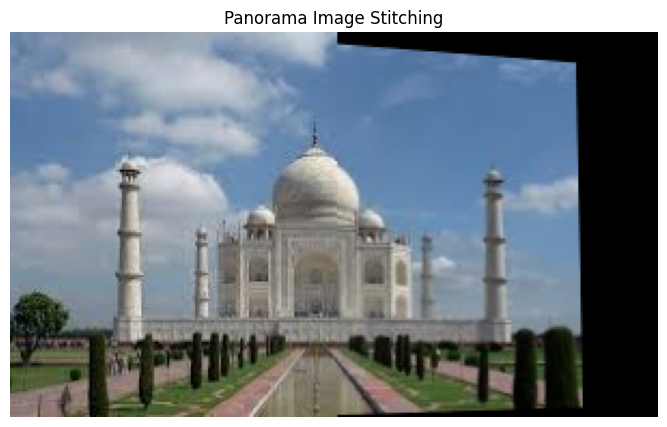

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(img1_path, img2_path):
    # Load images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    if img1 is None or img2 is None:
        print("Error: One or both image paths are incorrect.")
        return

    # Resize img2 to match the height of img1
    img2 = cv2.resize(img2, (img2.shape[1], img1.shape[0]))

    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Use SIFT to detect keypoints & descriptors
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # BFMatcher to find matches
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test to filter good matches
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    if len(good_matches) > 10:
        # Extract keypoints from good matches
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Find Homography matrix
        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Warp image to align with the second image
        width = img1.shape[1] + img2.shape[1]
        height = img1.shape[0]
        result = cv2.warpPerspective(img1, H, (width, height))
        result[0:img2.shape[0], 0:img2.shape[1]] = img2  # Overlay second image

        # Show result
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Panorama Image Stitching")
        plt.axis("off")
        plt.show()
    else:
        print("Not enough matches found!")

# Run Panorama Stitching
stitch_images('/content/Taj2.jpeg', '/content/Taj1.jpeg')

2. Apply the SURF algorithm to detect and match key points between two images with different scales and orientations.

AS surf is not compatible with colab we used ORB

ORB

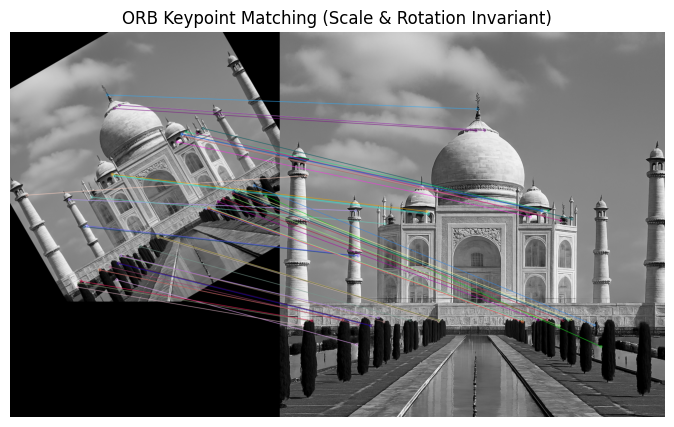

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_match_orb(img1_path, img2_path):
    # Load images in grayscale
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print("Error: Image not found!")
        return

    # Create ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    if des1 is None or des2 is None:
        print("Error: No keypoints detected!")
        return

    # BFMatcher with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches, cmap='gray')
    plt.title("ORB Keypoint Matching (Scale & Rotation Invariant)")
    plt.axis("off")
    plt.show()

# Run the function with two test images
detect_and_match_orb('/content/Taj_Mahal_scaled_rotated.png','/content/TajMahal.png')


**3**. Implement the Harris corner detector to find and visualize corners in a grayscale image.

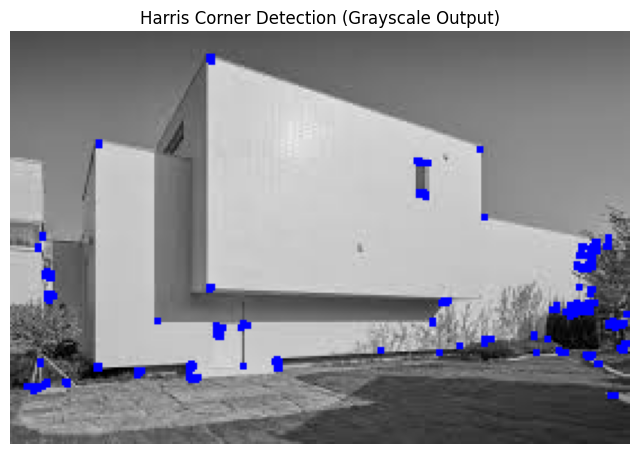

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Image not found!")
        return

    # Convert to float32 (required for Harris Corner Detection)
    gray = np.float32(img)

    # Apply Gaussian Blur to reduce noise
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply Harris Corner Detector
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Dilate the result to mark the corners more clearly
    dst = cv2.dilate(dst, None)

    # Create a copy of the grayscale image to display results
    result = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Thresholding: Mark the strongest corners in red
    result[dst > 0.03 * dst.max()] = [255, 0, 0]  # Red corners

    # Display result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title("Harris Corner Detection (Grayscale Output)")
    plt.axis("off")
    plt.show()

# Run Harris Corner Detection
harris_corner_detection('/content/square.jpeg')  # Ensure correct filename



SIFT , ORB and Harris Corner Detection

In [ ]:
!pip install opencv-contrib-python --upgrade

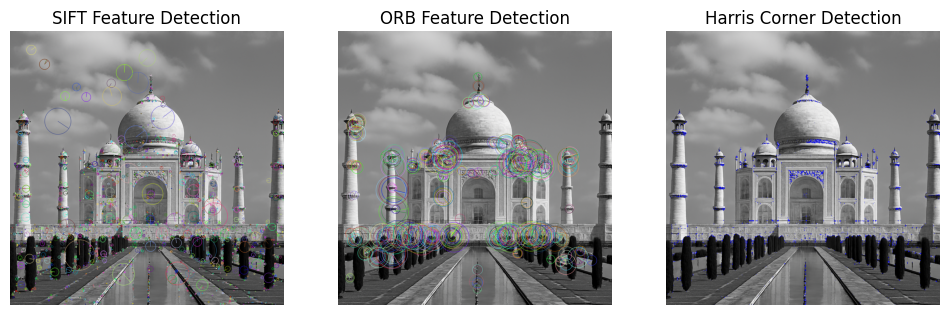

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sift(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    img_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_sift

def apply_orb(image):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    img_orb = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_orb

def apply_harris(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)

    img_harris = image.copy()
    img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red
    return img_harris

def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    img_sift = apply_sift(image)
    img_orb = apply_orb(image)
    img_harris = apply_harris(image)

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img_sift)
    plt.title('SIFT Feature Detection')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_orb)
    plt.title('ORB Feature Detection')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_harris)
    plt.title('Harris Corner Detection')
    plt.axis('off')

    plt.show()

# Example usage:
process_image("/content/A_black_and_white_photograph_showcases_the_Taj_Mah.png")
